# Extracting data for Music for ML analysis

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('Music_genre.xlsx')
df.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp's Night Out,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,The Shining Path,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Hurricane,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Nitro,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,Divide & Conquer,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


# Label Encoding

In [10]:
#key and genre are category variables and need to be converted into digits
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
df['key'] = label_encoder.fit_transform(df['key'])
df['music_genre']=label_encoder.fit_transform(df['music_genre'])
df['mode']=label_encoder.fit_transform(df['mode'])

# Correlation Analysis

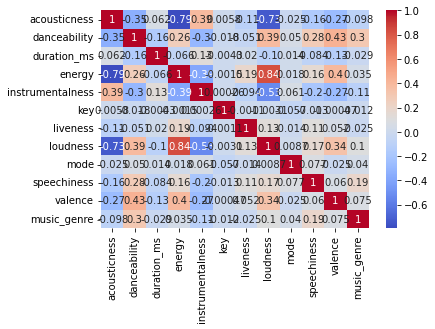

In [13]:
#correlation analysis
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Checking Anamolies

In [16]:
#dropping na values and excluding '?' from the data
df.dropna(inplace=True)
df=df[~df[df.columns].isin(['?']).any(axis=1)]
df.head()

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp's Night Out,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,5
1,The Shining Path,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.00200000000001,0.531,5
2,Hurricane,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,5
3,Nitro,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,5
4,Divide & Conquer,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,5


In [26]:
X=np.array(df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence']])
Y=np.array(df[['music_genre']])
Y=Y.ravel()

# Normalizing

In [19]:
#normalizing the data to be on same scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)

In [36]:
#Univariate feature selection method
from sklearn.feature_selection import SelectKBest, chi2
# Select top-k features using chi-squared test
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(normalized_X, Y)

In [37]:
#Divide the data into training and test set
from sklearn.model_selection import train_test_split

# Split the feature matrix and target array into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Classification models

In [39]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_regression = LogisticRegression(max_iter=10000)
classifier=logistic_regression.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression:{accuracy}')


Logistic Regression:0.39593513993780544


In [38]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
classifier=random_forest.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest:{accuracy}')

Random Forest:0.41725899600177696


In [44]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = naive_bayes.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes:", accuracy)

Naive Bayes: 0.3501776988005331
